Import the Libraries:

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samarappuliur","key":"21bbb0e2204e6aae433855b59c5fdd64"}'}

In [2]:
import os
import zipfile

# Make a directory for Kaggle API key
os.makedirs('/root/.kaggle', exist_ok=True)

# Move kaggle.json to the correct location
!mv kaggle.json /root/.kaggle/

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 97% 1.04G/1.06G [00:08<00:00, 244MB/s]
100% 1.06G/1.06G [00:09<00:00, 126MB/s]


In [4]:
# Unzip the downloaded dataset
!unzip -q /content/dogs-vs-cats.zip

In [5]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Initialize our model:

In [6]:
# initializing the Convolutional Neural Network
classifier = Sequential()

Convolution Step:

In [7]:
# Step 1: Convolution
classifier.add(Convolution2D(32, 3, 3 , activation = 'relu' ,input_shape = (64, 64, 3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pooling Step:

In [9]:
# step 2: Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Add a second convolution layer and pooling layer:

In [8]:
# adding asecond convolution Layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

 Flatten Step:

In [10]:
# step 3: Flattening
classifier.add(Flatten())

Full Connection layer:

In [11]:
# Step 4: Full Connection
classifier.add(Dense(units = 128, activation = 'relu')) # hidden Layer

In [12]:
classifier.add(Dense(units = 1, activation = 'sigmoid')) # output Layer

Compiling the CNN

In [13]:
#compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Part 2: Image Preprocessing

Import the library

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Train_datagen

In [15]:
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

Test_datagen

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

Training set & Test set

In [17]:
train_set = train_datagen.flow_from_directory('/content/dogs_vs_cats/train',
target_size=(64, 64),
batch_size=32,
class_mode='binary')

Found 20000 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/dogs_vs_cats/test',
target_size=(64, 64),
batch_size=32,
class_mode = 'binary')

Found 5000 images belonging to 2 classes.


Fit the CNN model

In [19]:
history = classifier.fit(
train_set,
steps_per_epoch= 20000,
epochs=10,
validation_data=test_set,
validation_steps= 5000)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
  625/20000 ━━━━━━━━━━━━━━━━━━━━ 42:06 130ms/step - accuracy: 0.5196 - loss: 0.6908

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 95s 5ms/step - accuracy: 0.5379 - loss: 0.6873 - val_accuracy: 0.5536 - val_loss: 0.6848
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 139s 4ms/step - accuracy: 0.5933 - loss: 0.6678 - val_accuracy: 0.6044 - val_loss: 0.6566
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 143s 5ms/step - accuracy: 0.6296 - loss: 0.6429 - val_accuracy: 0.6346 - val_loss: 0.6335
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 96s 5ms/step - accuracy: 0.6558 - loss: 0.6208 - val_accuracy: 0.6778 - val_loss: 0.6053
Epoch 5/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 140s 5ms/step - accuracy: 0.6659 - loss: 0.6093 - val_accuracy: 0.6254 - val_loss: 0.6330
Epoch 6/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 93s 5ms/step - accuracy: 0.6746 - loss: 0.5987 - val_accuracy: 0.6808 - val_loss: 0.5933
Epoch 7/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 144s 5ms/step - accuracy: 0.6808 - loss: 0.5954 - val_accuracy: 0.6814 - val_loss: 0.5917
Epoch 8/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 141s 5ms/step - accuracy: 0.6829

Part 3: Making a new prediction

3.1 Import the library

In [20]:
# import Libraries
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Import the Image



In [46]:
#load the single image fron dataset
test_image = image.load_img('/content/dogs_vs_cats/test/cats/cat.10952.jpg', target_size = (64, 64))

Set the Dimension of image

In [47]:
# set the dimension
img_array = image.img_to_array(test_image)
img_array = img_array /255.0

Set the Dimension of image

In [48]:
# set the dimension
img_array = np.expand_dims(img_array, axis = 0)

Make a prediction

In [49]:
# predict the correct image
result = classifier.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [50]:
result

array([[0.28666013]], dtype=float32)

In [51]:
# on the basis of training predict img
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [52]:
# on the basis of training predict img
# Get numerical output: 0 or 1
output = int(result[0][0] >= 0.5)  # 1 = dog, 0 = cat
print("Predicted Output:", output)  # This prints 0 or 1

Predicted Output: 0


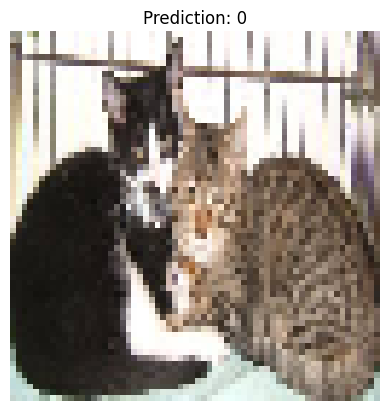

In [53]:
# Optional: Show the image
# Remove the batch dimension before plotting
plt.imshow(test_image)
plt.title(f"Prediction: {output}")  # Will show 0 or 1
plt.axis('off')
plt.show()

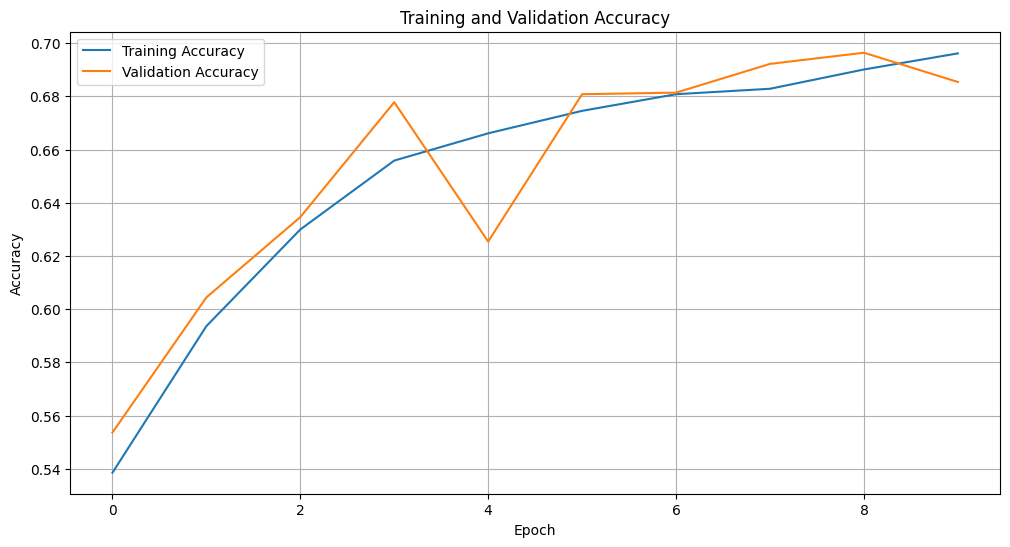

In [54]:
# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

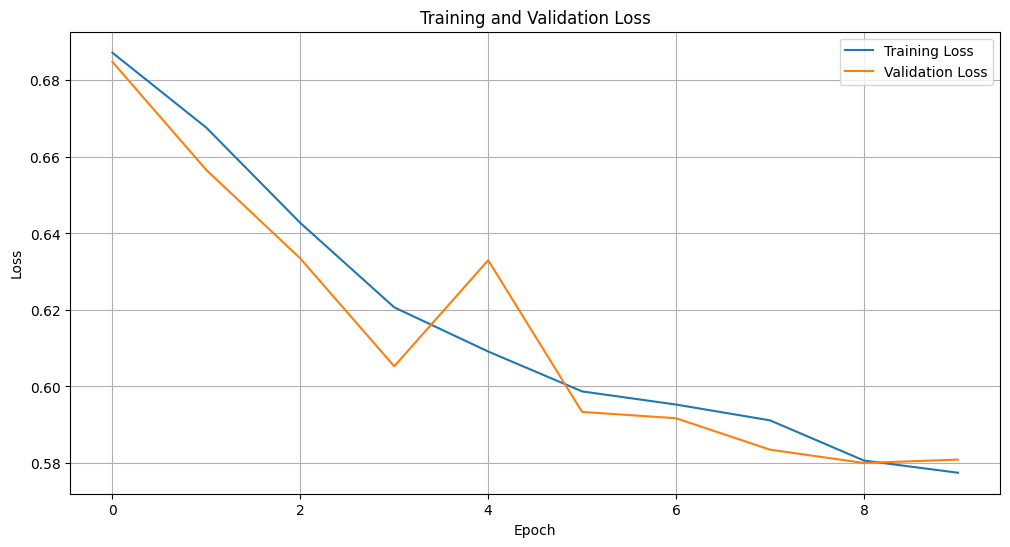

In [55]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()